In [56]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
X= df.iloc[:,:9]
Y= df.iloc[:,9]

# Standardizing the data

In [4]:
def get_standardized_data(data):
    df_norm = (data-data.min())/(data.max()-data.min())
    return(df_norm)

In [5]:
X=get_standardized_data(X)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [28]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [79]:
#Since the class 5 has just 4 data points hence we keep the n_splits as 3

In [41]:
kfold=KFold(n_splits=9)

In [42]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=kfold)
print(cvs.mean())

0.42632850241545894


In [66]:
noofneighbours = [2*i+1 for i in range(0,10)]
cvsl =[]
for neighbours in noofneighbours:
    model = KNeighborsClassifier(n_neighbors=neighbours)
    model.fit(X,Y)
    cvs=cross_val_score(model,X,Y,cv=9)
    print("no of neighbours: "+str(neighbours)+"     Average Score: "+str(cvs.mean()))
    cvsl.append(cvs.mean())

no of neighbours: 1     Average Score: 0.6773349436392915
no of neighbours: 3     Average Score: 0.6539855072463767
no of neighbours: 5     Average Score: 0.6497584541062802
no of neighbours: 7     Average Score: 0.6215780998389694
no of neighbours: 9     Average Score: 0.6024557165861514
no of neighbours: 11     Average Score: 0.5791062801932366
no of neighbours: 13     Average Score: 0.5933977455716586
no of neighbours: 15     Average Score: 0.5980273752012883
no of neighbours: 17     Average Score: 0.5793075684380032
no of neighbours: 19     Average Score: 0.5933977455716586


(0.0, 1.4)

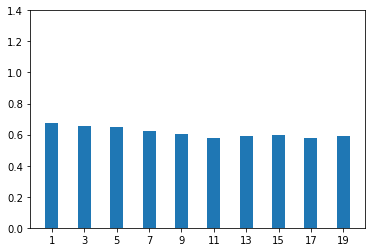

In [60]:
plt.bar(noofneighbours,cvsl)
plt.xticks(noofneighbours)
plt.ylim(0.0,1.4)

In [72]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=9)
cvs.mean()

0.6539855072463767

# Checking model on 2 random datapoints

In [73]:
X= df.iloc[212:214,:9]
Y= df.iloc[212:214,9]

In [76]:
model.predict(X)

array([6, 6], dtype=int64)

In [77]:
Y

212    7
213    7
Name: Type, dtype: int64

Even though 1 gives higher accuracy , we choose 3 as optimal number beacuse just considering 1 nearest neighbour is inadequate to reach a conclusion

# Hence optimum number of neighbours is 3 with accuracy 0.654 for KNN